In [52]:
import numpy as np
#from astropy import units as u
%matplotlib inline
import matplotlib.pyplot as plt
#from astropy.analytic_functions import \
#                blackbody_nu as bb_nu
from astropy import constants as const


class galsed():
    
    #Speed of light in um/s:
    c = 1e6*(const.c).value
    h = (const.h).value
    kb = (const.k_B).value
    
    def __init__(self, \
                 norm=1., temp=25., beta=1.5, \
                 plnorm=0.5, alpha=2., turnover=50., \
                 pah=0.1):
        
        #Set the wavelength array; can be changed with setwav():    
        self.wav = np.logspace(np.log10(5),np.log10(1000),1024)
        self.nu = self.c/self.wav
        
        #Set default BB properties; can be changed with setbb():    
        self.bb_norm = norm    
        self.bb_temp = temp
        self.beta = beta
        
        #Set default PL properties; can be changed with setpl:
        self.relnorm = plnorm
        self.alpha = alpha
        self.tp = turnover
        
        #Set default PAH norm (as fraction of LIR?):
        self.pahnorm = pah
    
    def setwav(self, wav):
        #(Re)Define the wavelength array (in microns):    
        self.wav = wav
        self.nu = self.c/self.wav
    
    def setbb(self, norm=1., temp=25., beta=1.5):
        #(Re)Define the Blackbody parameters:
        self.bb_norm = norm
        self.bb_temp = temp
        self.beta = beta

    def setpl(self, plnorm=0.5, alpha=2., turnover=50.):
        #(Re)Define the Blackbody parameters:
        self.relnorm = plnorm
        self.alpha = alpha
        self.tp = turnover
    
    def getwav(self):
        return self.wav
    
    def bb(self, wav, temp):
        
        #Use own BB generator (ripped from astropy);
        #astropy's is slow, largely due to checks.
        nu = self.c/wav
        log_boltz = self.h * nu / (self.kb * temp)
        boltzm1 = np.expm1(log_boltz)
        return (2.0 * self.h * nu ** 3 / \
                (self.c ** 2 * boltzm1))
    
    def getbb(self):
        
        #Get the modified BB spectrum:    
        #Calculate normalisation:
        wavpeak = 2.9e3/self.bb_temp
        nupeak = self.c/wavpeak
        norm = self.bb_norm/((nupeak**self.beta)*\
                       self.bb(wavpeak, self.bb_temp))
        
        bb = self.bb(self.wav, self.bb_temp)
        return norm*bb*(self.nu**self.beta)
        
    def getpl(self):
        
        #Get PL spectrum:
        norm = self.bb_norm*self.relnorm/\
            ((self.tp**self.alpha)*np.exp(-1.))
        
        return norm*(self.wav**self.alpha)*\
                             np.exp(-(self.wav/self.tp)**2.)
        
    def getsed(self):
        return self.getpl()+self.getbb()

done


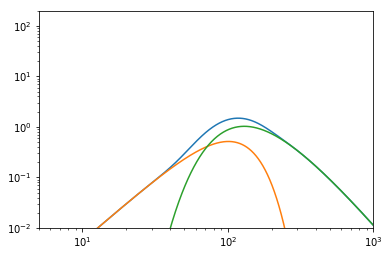

In [55]:
a = galsed(alpha=2.5,turnover=90.)
for i in range(100000):
    a.getsed()
print 'done'
#a.setpl(turnover=10)
plt.plot(a.getwav(), a.getsed())
plt.plot(a.getwav(), a.getpl())
plt.plot(a.getwav(), a.getbb())
plt.axis([5,1000,1e-2,200])
plt.xscale('log')
plt.yscale('log')
plt.show()
